In [2]:
import sys
# sys.path.append("D:\thesis\thesis\rllib")

import rllib as rl
import json
import joblib
import numpy as np
dataset_train = "./data_preprossing/output/train_cleaned.csv"
dataset_test = "./data_preprossing/output/test_cleaned.csv"
symptom_map_file = "./data/basic/symptoms_db.json"
condition_map_file = "./data/basic/conditions_db.json"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
# clf_file = "data/basic/data/output/rf/rf_clf.joblib"
# clf_file = "./symtom_models/output/nb/nb_serialized_sparse.joblib"
# clf_data = joblib.load(clf_file)
# clf = clf_data.get('clf')
# import datetime
# import sys
# from pathlib import Path
# curr_path = str(Path().absolute())
# parent_path = str(Path().absolute().parent)
# sys.path.append(parent_path) # add current terminal path to sys.path
# curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # obtain current time

# test = "./data_preprossing/output/datas/Viral meningitis  enterovirus.csv"

In [5]:
import os 
path = "./hrloutput/"
text_files = [f for f in os.listdir(path) if f.endswith('.pkl')]
print(path+text_files[0])

./hrloutput/model_d33hrl_s0.51_r-1.893_t11.0_mr0.407_mr2-0.8090.94_e-1.pkl


In [92]:
env = rl.environment.RLBasicMedEnv(
    data_file=test,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="rf",
    max_turn=20,
    epoch = 5000
)

In [ ]:
#test
from scipy.sparse import  csc_matrix
assert env.num_symptoms == 104
assert env.num_conditions == 54
env.reset()
line = env.readline()
assert line is not None, "line is None!"
# assert env.line_number == 1, "Line number is not None"
assert env.state is not None, "State is not None just after init"
assert env.data is not None, "Data file has not been loaded"
assert env.patient is not None, "Patient is not None just after init"
#print(env.state)
patient = csc_matrix(env.get_patient_vector())
_,rewards,_ = env.diagnose(21)

print(rewards)

In [3]:
cfg = rl.config.QlearningConfig()
agent = rl.agent.AgentQlearning(env=env,config=cfg,debug=False)

rl.configuration.MAX_TURN = 20

In [4]:
bench = rl.bench.MedQBench(agent,num_episodes=5000,num_epoches=10)

In [5]:
bench.run_trial(debug=False)
rewards,success,average_rewards,average_steps =bench.rewardList,bench.get_success_rate(),bench.get_average_rewards(),bench.get_average_turn()

save model successfully


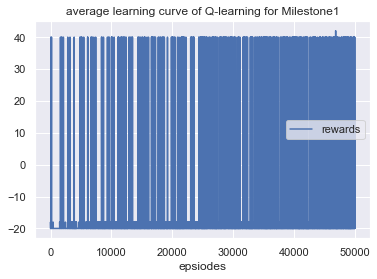

0.0072
-19.443
4.64988


In [6]:
rl.common.make_dir(cfg.result_path,cfg.model_path)
agent.save(path = cfg.model_path)
rl.common.plot_rewards(rewards,path=cfg.result_path)
print(success)
print(average_rewards)
print(average_steps)

load model successfully
0.013
-18.99
6.123


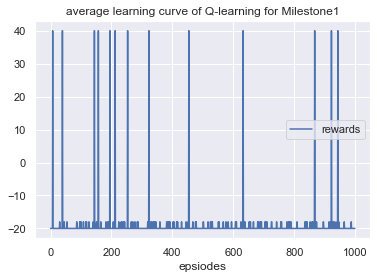

In [239]:

result_path = "D:/thesis/thesis/outputs/baseline/20211114-110156/models/"
cfg = rl.config.QlearningConfig()
cfg.eval_eps = 1000
# agent.load(path =result_path)
env1 = rl.environment.RLBasicMedEnv(
    data_file=dataset_train,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=rl.configuration.MAX_TURN,
    epoch = 1000
)
agent = rl.agent.AgentQlearning(env=env1,config=cfg,debug=False)
agent.load(path =cfg.model_path)
rewards,success,steps = rl.bench.eval(cfg,env=env1,agent=agent)
print(success/cfg.eval_eps)
print(np.mean(rewards))
print(np.mean(steps))
rl.common.plot_rewards(rewards,path=cfg.model_path)

In [236]:
cfg = rl.config.QlearningConfig()
from rllib import configuration as config
from itertools import count
cfg.eval_eps = 1
# agent.load(path =result_path)
env2 = rl.environment.RLBasicMedEnv(
    data_file=dataset_train,
    symptom_map_file=symptom_map_file,
    condition_map_file=condition_map_file,
    clf=clf,
    classifer="nb",
    max_turn=rl.configuration.MAX_TURN,
    epoch = 1000
)
agent = rl.agent.AgentQlearning(env=env2,config=cfg,debug=False)
agent.load(path =cfg.model_path)




load model successfully


In [241]:
for j in range(1000):
    env2.reset()
    state = env2.state
    # print(state.age,state.gender,state.race)
    ep_reward = 0
    for jdx in count():
        action = agent.predict(state)
        next_state, reward, done = env.take_action(action)
        state = next_state
        ep_reward +=reward
        if jdx+1>2:
            print(state.age,state.gender,state.race)
        if jdx+1 > config.MAX_TURN or done == config.DIALOGUE_STATUS_FAILED:
                    num_runs = jdx + 1
                    # print(str(num_runs)+"fails")
                    break   
        if done==config.DIALOGUE_STATUS_SUCCESS:
                    success +=1
                    num_runs = jdx + 1
                    # print(action)
                    # print(env.state.age,env.state.race,env.state.gender)
                    # print(str(num_runs)+"sucess")
                    break
   

In [42]:
    body_parts_json = "./data/basic/body-parts-enc.json"
    excitation_enc_json = "./data/basic/excitation_encoding.json"
    frequency_enc_json = "./data/basic/frequency_encoding.json"
    nature_enc_json = "./data/basic/nature_encoding.json"
    vas_enc_json = "./data/basic/vas_encoding.json"  
    onset_json = "./data/basic/onset_encoding.json"
    duration_json = "./data/basic/duration_encoding.json"  

    with open(body_parts_json) as fp:
        body_parts = json.load(fp)

    with open(excitation_enc_json) as fp:
        excitation_enc = json.load(fp)

    with open(frequency_enc_json) as fp:
        frequency_enc = json.load(fp)

    with open(nature_enc_json) as fp:
        nature_enc = json.load(fp)

    with open(vas_enc_json) as fp:
        vas_enc = json.load(fp)

    with open(onset_json) as fp:
        onset_enc = json.load(fp)

    with open(duration_json) as fp:
        duration_enc = json.load(fp) 


In [7]:
#test patient's vector
from scipy.sparse import  csc_matrix
line = env.get_line()
print(line)
patient = env.parse_line(line)
patient_vector = np.zeros(3 + 8*env.num_symptoms, dtype=np.uint16)
patient_vector[2] = patient.age
patient_vector[0] = patient.gender
patient_vector[1] = patient.race
# race_idx = patient.race +2
# patient_vector[race_idx] = 1
p = np.array(patient.symptoms)
has_symptom = np.where(p==1)[0]*8+3
# print(patient.age)
print(patient.condition)
for _symptom_idx in has_symptom:
            _nature_idx =_symptom_idx+1
            _location_idx = _symptom_idx + 2
            _vas_idx = _symptom_idx + 3
            _duration_idx = _symptom_idx + 4
            _onset_idx = _symptom_idx + 5
            _excitation_idx = _symptom_idx + 6
            _frequency_idx = _symptom_idx + 7
            _symptom_val = 1
            _nature_val =  1
            _location_val =  1
            _vas_val =  1
            _excitation_val =  1
            _frequency_val =  1
            _duration_val = 0
            _onset_val = 0
            patient_vector[_symptom_idx] = 1
            patient_vector[_nature_idx] = _nature_val
            patient_vector[_location_idx] = _location_val
            patient_vector[_vas_idx] = _vas_val
            patient_vector[_duration_idx] = _duration_val
            patient_vector[_onset_idx] = _onset_val
            patient_vector[_frequency_idx] = _frequency_val
            patient_vector[_excitation_idx] = _excitation_val
patient_vector = csc_matrix(patient_vector.reshape(1, -1))
num_features = env.num_symptoms*8 +3
reg_indices = np.array([0, 1, 2])
symptom_indices = np.arange(3, num_features, 8, dtype=np.uint16)
nature_indices = symptom_indices + 1
location_indices = symptom_indices + 2
intensity_indices = symptom_indices + 3
duration_indices = symptom_indices + 4
onset_indices = symptom_indices + 5
excitation_indices = symptom_indices + 6
frequency_indices = symptom_indices + 7
_nb_indices = np.hstack([
                    reg_indices,
                    symptom_indices,
                    nature_indices, location_indices, intensity_indices, excitation_indices, frequency_indices,
                    duration_indices, onset_indices
                    ])
nb_vector = patient_vector[:,_nb_indices]
prediction = clf.predict_proba(nb_vector)
print(prediction)
sorted_number = sorted(enumerate(prediction[0]),key = lambda x :x[1],reverse = True)
idx = [i[0] for i in sorted_number]
nums = [i[1] for i in sorted_number]
print(sorted_number)
print(idx[0:10])
print(nums)
sorted_ = np.argsort(prediction)
classlabel = [24, 29, 49, 38, 5, 3, 43, 48, 41, 37, 12, 31, 9, 42, 35, 28, 8, 14, 36, 4, 40, 19, 20, 21, 39, 53, 10, 25, 0, 44, 2, 17, 45]
print(sorted_[0])
top_5 = []
for i in range(33):
    top_5.append(classlabel[sorted_[0][-(i+1)]])
print(top_5)



198,M,white,58,Pneumothorax,2.0,Pain:Stinging:::::::33;Altered_breathing:Dyspnea:::::::40
36
[[2.37921474e-091 2.87716725e-240 2.56749491e-094 1.43233946e-232
  6.02421898e-215 1.15134379e-182 0.00000000e+000 0.00000000e+000
  1.54878145e-144 5.66907184e-263 0.00000000e+000 0.00000000e+000
  3.29993617e-118 0.00000000e+000 2.88326063e-136 5.83628721e-040
  0.00000000e+000 6.02648108e-188 0.00000000e+000 2.47783412e-294
  0.00000000e+000 2.59216929e-144 1.00000000e+000 4.71607398e-318
  0.00000000e+000 6.03528403e-033 3.64806136e-110 3.10505901e-175
  6.67587853e-155 0.00000000e+000 1.90572477e-155 1.26743696e-256
  0.00000000e+000]]
[(22, 1.0), (25, 6.035284028719724e-33), (15, 5.8362872070170055e-40), (0, 2.379214744734481e-91), (2, 2.567494907037309e-94), (26, 3.648061355724632e-110), (12, 3.2999361735912327e-118), (14, 2.8832606314041017e-136), (21, 2.5921692914839006e-144), (8, 1.548781451894702e-144), (28, 6.67587852846897e-155), (30, 1.905724770685665e-155), (27, 3.10505900794188

In [94]:
#test patient's vector
from scipy.sparse import  csc_matrix
line = env.get_line()
patient = env.parse_line(line)
patient_vector = np.zeros(3 + env.num_symptoms, dtype=np.uint16)
patient_vector[2] = patient.age
patient_vector[0] = patient.gender
patient_vector[1] = patient.race
# race_idx = patient.race +2
# patient_vector[race_idx] = 1
p = np.array(patient.symptoms)
has_symptom = np.where(p==1)[0]
print(has_symptom)
# print(patient.age)
print(patient.condition)
for _symptom_idx in has_symptom:
    patient_vector[_symptom_idx] = 1

patient_vector = csc_matrix(patient_vector.reshape(1, -1))
num_features = env.num_symptoms +3
reg_indices = np.array([0, 1, 2])
symptom_indices = np.arange(3, num_features, dtype=np.uint16)
_nb_indices = np.hstack([
                    reg_indices,
                    symptom_indices    
                    ])
nb_vector = patient_vector[:,_nb_indices]
prediction = clf.predict_proba(patient_vector)
sorted_ = np.argsort(prediction)
sorted_number = sorted(enumerate(prediction[0]),key = lambda x :x[1],reverse = True)
idx = [i[0] for i in sorted_number]
nums = [i[1] for i in sorted_number]
print(sorted_number)
print(idx[0:10])
print(nums)
sorted_ = np.argsort(prediction)
classlabel = [24, 29, 49, 38, 5, 3, 43, 48, 41, 37, 12, 31, 9, 42, 35, 28, 8, 14, 36, 4, 40, 19, 20, 21, 39, 53, 10, 25, 0, 44, 2, 17, 45]
# classlabel.sort()
# print(classlabel)
print(sorted_[0])
top_5 = []
for i in range(33):
    top_5.append(classlabel[sorted_[0][-(i+1)]])
print(top_5)


[46 89]
48
[(10, 0.8992055862317604), (4, 0.06126847108946653), (3, 0.00511211802904998), (22, 0.004280596460761396), (21, 0.0042652116525742365), (9, 0.0038267377231509516), (23, 0.0033937001934004345), (14, 0.003296823816977696), (6, 0.0030389954868316393), (26, 0.002774656050436808), (8, 0.002616897042257008), (31, 0.002040937054136522), (5, 0.0010312757685150447), (19, 0.0010258793010097125), (2, 0.0004974830624691523), (13, 0.00048666258933431476), (24, 0.00040896229154416665), (30, 0.00037824259174987614), (7, 0.0003621837497277604), (28, 0.00022024345603488174), (20, 0.00013769329071701764), (1, 0.00010066986273727865), (27, 8.848758807962931e-05), (15, 7.258950869534075e-05), (17, 3.237555000442539e-05), (12, 1.3997259146926112e-05), (0, 1.2921491057310766e-05), (16, 7.73365544067753e-06), (29, 6.734248235414114e-07), (25, 5.309037548564012e-07), (18, 3.8413247971470923e-07), (32, 2.790273516659309e-07), (11, 6.645199779047714e-10)]
[10, 4, 3, 22, 21, 9, 23, 14, 6, 26]
[0.89920